In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('E:\\WORKSPACE\\Medical Cost Personal Datasets\\insurance copy.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,"region, charges"
0,19.0,female,27.900,0.0,yes,"southwest, 16884.924"
1,18.0,male,33.770,1.0,no,"southeast, 1725.5523"
2,28.0,male,33.000,3.0,no,"southeast, 4449.462"
3,33.0,male,22.705,0.0,no,"northwest, 21984.47061"
4,32.0,male,28.880,0.0,no,"northwest, 3866.8552"


In [4]:
# Tách cột 'region_charges' thành hai cột 'region' và 'charges'
insurance_dataset[['region', 'charges']] = insurance_dataset['region, charges'].str.split(', ', expand=True)

# Chuyển đổi cột 'charges' thành kiểu số thực
insurance_dataset['charges'] = insurance_dataset['charges'].astype(float)

# Xóa cột 'region_charges' ban đầu
insurance_dataset.drop(columns=['region, charges'], inplace=True)

insurance_dataset


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [5]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [6]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [7]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1336 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [8]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         2
bmi         2
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# statistical Measures of the dataset

# Tùy chọn pandas để hiển thị đầy đủ số mà không dùng số mũ
pd.set_option('display.float_format', '{:.4f}'.format)
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.0000,1336.0000,1338.0000,1338.0000
mean,39.0954,30.6693,1.0882,21113.4716
std,14.2575,6.0950,1.2112,208318.4233
min,-44.0000,15.9600,-4.0000,1121.8739
25%,26.0000,26.3087,0.0000,4740.2872
50%,39.0000,30.4000,1.0000,9382.0330
75%,51.0000,34.7000,2.0000,16639.9125
max,64.0000,53.1300,5.0000,6300770.4280


In [10]:
# statistical Measures of the dataset

# Tùy chọn pandas để hiển thị đầy đủ số mà không dùng số mũ
pd.set_option('display.float_format', '{:.4f}'.format)
insurance_dataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.0000,1336,1336.0000,1338.0000,1338,1338,1338.0000
unique,NaN,2,NaN,NaN,2,7,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1064,361,NaN
mean,39.0954,NaN,30.6693,1.0882,NaN,NaN,21113.4716
std,14.2575,NaN,6.0950,1.2112,NaN,NaN,208318.4233
min,-44.0000,NaN,15.9600,-4.0000,NaN,NaN,1121.8739
25%,26.0000,NaN,26.3087,0.0000,NaN,NaN,4740.2872
50%,39.0000,NaN,30.4000,1.0000,NaN,NaN,9382.0330
75%,51.0000,NaN,34.7000,2.0000,NaN,NaN,16639.9125


In [11]:
# Hàm kiểm tra và chuyển đổi giá trị cột 'age'
def validate_and_correct_age(age):
    try:
        age = float(age)
        if age <= 0:
            age = abs(age)
        return int(age)
    except ValueError:
        return 0

# Áp dụng hàm trên cột 'age'
insurance_dataset['age'] = insurance_dataset['age'].apply(validate_and_correct_age)

print("\nDữ liệu sau khi xử lý:")
print(insurance_dataset)

# Kiểm tra và xử lý giá trị NaN nếu có
if insurance_dataset['age'].isna().sum() >= 0:
    print("\nCó giá trị không thể chuyển đổi thành số nguyên. Hãy xử lý giá trị NaN theo yêu cầu.")
else:
    print("\nKhông có giá trị nào không thể chuyển đổi thành số nguyên.")



Dữ liệu sau khi xử lý:
      age     sex     bmi  children smoker     region    charges
0      19  female 27.9000    0.0000    yes  southwest 16884.9240
1      18    male 33.7700    1.0000     no  southeast  1725.5523
2      28    male 33.0000    3.0000     no  southeast  4449.4620
3      33    male 22.7050    0.0000     no  northwest 21984.4706
4      32    male 28.8800    0.0000     no  northwest  3866.8552
...   ...     ...     ...       ...    ...        ...        ...
1333   50    male 30.9700    3.0000     no  northwest 10600.5483
1334   18  female 31.9200    0.0000     no  northeast  2205.9808
1335   18  female 36.8500    0.0000     no  southeast  1629.8335
1336   21  female 25.8000    0.0000     no  southwest  2007.9450
1337   61  female 29.0700    0.0000    yes  northwest 29141.3603

[1338 rows x 7 columns]

Có giá trị không thể chuyển đổi thành số nguyên. Hãy xử lý giá trị NaN theo yêu cầu.


In [12]:
# Kiểm tra và lọc các hàng có giá trị âm hoặc bằng 0 trong cột 'age'
invalid_ages = insurance_dataset[insurance_dataset['age'].apply(lambda x: float(x) <= 0 if isinstance(x, (int, float, str)) else False)]
invalid_ages

,age,sex,bmi,children,smoker,region,charges
894,0,male,32.1100,0.0000,no,northeast,13555.0049


In [13]:
# Tính giá trị trung bình của cột 'age' 
mean_age = insurance_dataset['age'].mean()

# Làm tròn giá trị trung bình thành số nguyên
mean_age = int(round(mean_age))

# Thay thế các giá trị 0 bằng giá trị trung bình
insurance_dataset['age'] = insurance_dataset['age'].replace(0, mean_age)

print("\nDữ liệu sau khi thay thế các giá trị không hợp lệ và 0 bằng giá trị trung bình:")
print(insurance_dataset)



Dữ liệu sau khi thay thế các giá trị không hợp lệ và 0 bằng giá trị trung bình:
      age     sex     bmi  children smoker     region    charges
0      19  female 27.9000    0.0000    yes  southwest 16884.9240
1      18    male 33.7700    1.0000     no  southeast  1725.5523
2      28    male 33.0000    3.0000     no  southeast  4449.4620
3      33    male 22.7050    0.0000     no  northwest 21984.4706
4      32    male 28.8800    0.0000     no  northwest  3866.8552
...   ...     ...     ...       ...    ...        ...        ...
1333   50    male 30.9700    3.0000     no  northwest 10600.5483
1334   18  female 31.9200    0.0000     no  northeast  2205.9808
1335   18  female 36.8500    0.0000     no  southeast  1629.8335
1336   21  female 25.8000    0.0000     no  southwest  2007.9450
1337   61  female 29.0700    0.0000    yes  northwest 29141.3603

[1338 rows x 7 columns]


In [14]:
print(insurance_dataset.describe(include='all'))
# checking for missing values
print(insurance_dataset.isnull().sum())

             age   sex       bmi  children smoker     region      charges
count  1338.0000  1336 1336.0000 1338.0000   1338       1338    1338.0000
unique       NaN     2       NaN       NaN      2          7          NaN
top          NaN  male       NaN       NaN     no  southeast          NaN
freq         NaN   675       NaN       NaN   1064        361          NaN
mean     39.1898   NaN   30.6693    1.0882    NaN        NaN   21113.4716
std      14.0361   NaN    6.0950    1.2112    NaN        NaN  208318.4233
min      18.0000   NaN   15.9600   -4.0000    NaN        NaN    1121.8739
25%      27.0000   NaN   26.3087    0.0000    NaN        NaN    4740.2872
50%      39.0000   NaN   30.4000    1.0000    NaN        NaN    9382.0330
75%      51.0000   NaN   34.7000    2.0000    NaN        NaN   16639.9125
max      64.0000   NaN   53.1300    5.0000    NaN        NaN 6300770.4280
age         0
sex         2
bmi         2
children    0
smoker      0
region      0
charges     0
dtype: int64


In [15]:
# Tính tỷ lệ phân phối
sex_counts = insurance_dataset['sex'].value_counts(normalize=True)
male_ratio = sex_counts.get('male', 0)
female_ratio = sex_counts.get('female', 0)
print(sex_counts)
# Đảm bảo tổng xác suất là 1 và không bằng 0
total_ratio = male_ratio + female_ratio
if total_ratio != 0:
    male_ratio = male_ratio / total_ratio
    female_ratio = female_ratio / total_ratio

print(f"\nTỷ lệ phân phối: male={male_ratio:.2f}, female={female_ratio:.2f}")

# Tạo một mảng các giá trị cần thay thế theo tỷ lệ phân phối
if total_ratio != 0:
    values_to_fill = np.random.choice(['male', 'female'], size=insurance_dataset['sex'].isna().sum(), p=[male_ratio, female_ratio])
else:
    values_to_fill = np.random.choice(['male', 'female'], size=insurance_dataset['sex'].isna().sum())

# Thay thế giá trị thiếu bằng các giá trị được tạo ra
insurance_dataset.loc[insurance_dataset['sex'].isna(), 'sex'] = values_to_fill

print("\nDữ liệu sau khi thay thế giá trị thiếu:")
print(insurance_dataset)

sex
male     0.5052
female   0.4948
Name: proportion, dtype: float64

Tỷ lệ phân phối: male=0.51, female=0.49

Dữ liệu sau khi thay thế giá trị thiếu:
      age     sex     bmi  children smoker     region    charges
0      19  female 27.9000    0.0000    yes  southwest 16884.9240
1      18    male 33.7700    1.0000     no  southeast  1725.5523
2      28    male 33.0000    3.0000     no  southeast  4449.4620
3      33    male 22.7050    0.0000     no  northwest 21984.4706
4      32    male 28.8800    0.0000     no  northwest  3866.8552
...   ...     ...     ...       ...    ...        ...        ...
1333   50    male 30.9700    3.0000     no  northwest 10600.5483
1334   18  female 31.9200    0.0000     no  northeast  2205.9808
1335   18  female 36.8500    0.0000     no  southeast  1629.8335
1336   21  female 25.8000    0.0000     no  southwest  2007.9450
1337   61  female 29.0700    0.0000    yes  northwest 29141.3603

[1338 rows x 7 columns]


In [16]:
print(insurance_dataset.describe(include='all'))
print()
# checking for missing values
print(insurance_dataset.isnull().sum())

             age   sex       bmi  children smoker     region      charges
count  1338.0000  1338 1336.0000 1338.0000   1338       1338    1338.0000
unique       NaN     2       NaN       NaN      2          7          NaN
top          NaN  male       NaN       NaN     no  southeast          NaN
freq         NaN   676       NaN       NaN   1064        361          NaN
mean     39.1898   NaN   30.6693    1.0882    NaN        NaN   21113.4716
std      14.0361   NaN    6.0950    1.2112    NaN        NaN  208318.4233
min      18.0000   NaN   15.9600   -4.0000    NaN        NaN    1121.8739
25%      27.0000   NaN   26.3087    0.0000    NaN        NaN    4740.2872
50%      39.0000   NaN   30.4000    1.0000    NaN        NaN    9382.0330
75%      51.0000   NaN   34.7000    2.0000    NaN        NaN   16639.9125
max      64.0000   NaN   53.1300    5.0000    NaN        NaN 6300770.4280

age         0
sex         0
bmi         2
children    0
smoker      0
region      0
charges     0
dtype: int64


In [17]:
# Thay thế giá trị thiếu bằng giá trị trung bình của cột 'bmi'
insurance_dataset['bmi'] = insurance_dataset['bmi'].fillna(insurance_dataset['bmi'].mean())

# Kiểm tra xem còn giá trị nào bị thiếu không
print("After handling missing values:\n", insurance_dataset.isnull().sum())


After handling missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [18]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0.0000,yes,southwest,16884.9240
1,18,male,33.7700,1.0000,no,southeast,1725.5523
2,28,male,33.0000,3.0000,no,southeast,4449.4620
3,33,male,22.7050,0.0000,no,northwest,21984.4706
4,32,male,28.8800,0.0000,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.9700,3.0000,no,northwest,10600.5483
1334,18,female,31.9200,0.0000,no,northeast,2205.9808
1335,18,female,36.8500,0.0000,no,southeast,1629.8335
1336,21,female,25.8000,0.0000,no,southwest,2007.9450


In [19]:
print(insurance_dataset.describe(include='all'))
print()
# checking for missing values
print(insurance_dataset.isnull().sum())

             age   sex       bmi  children smoker     region      charges
count  1338.0000  1338 1338.0000 1338.0000   1338       1338    1338.0000
unique       NaN     2       NaN       NaN      2          7          NaN
top          NaN  male       NaN       NaN     no  southeast          NaN
freq         NaN   676       NaN       NaN   1064        361          NaN
mean     39.1898   NaN   30.6693    1.0882    NaN        NaN   21113.4716
std      14.0361   NaN    6.0904    1.2112    NaN        NaN  208318.4233
min      18.0000   NaN   15.9600   -4.0000    NaN        NaN    1121.8739
25%      27.0000   NaN   26.3150    0.0000    NaN        NaN    4740.2872
50%      39.0000   NaN   30.4000    1.0000    NaN        NaN    9382.0330
75%      51.0000   NaN   34.6938    2.0000    NaN        NaN   16639.9125
max      64.0000   NaN   53.1300    5.0000    NaN        NaN 6300770.4280

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [20]:
def check_value(x):
    try:
        # Chuyển giá trị thành float
        value = float(x)
        # Kiểm tra nếu giá trị là số âm hoặc là số thực
        return value < 0 or (value % 1 != 0)  # value % 1 != 0 kiểm tra số thực
    except ValueError:
        return False

filtered_values = insurance_dataset[insurance_dataset['children'].apply(check_value)]
print("\nCác hàng chứa số âm hoặc số thực trong cột 'children':")
print(filtered_values)


Các hàng chứa số âm hoặc số thực trong cột 'children':
     age     sex     bmi  children smoker     region   charges
884   25    male 26.6950   -4.0000     no  northwest 4877.9811
990   26  female 19.8000    0.0221     no  southwest 3378.9100


In [21]:
# Hàm kiểm tra và chuyển đổi giá trị cột 'children'
def validate_and_correct_children(children):
    try:
        children = float(children)
        if children <= 0:
            children = abs(children)
        return int(children)
    except ValueError:
        return 0
# Áp dụng hàm trên cột 'children'
insurance_dataset['children'] = insurance_dataset['children'].apply(validate_and_correct_children)

print("\nDữ liệu sau khi xử lý:")
print(insurance_dataset)



Dữ liệu sau khi xử lý:
      age     sex     bmi  children smoker     region    charges
0      19  female 27.9000         0    yes  southwest 16884.9240
1      18    male 33.7700         1     no  southeast  1725.5523
2      28    male 33.0000         3     no  southeast  4449.4620
3      33    male 22.7050         0     no  northwest 21984.4706
4      32    male 28.8800         0     no  northwest  3866.8552
...   ...     ...     ...       ...    ...        ...        ...
1333   50    male 30.9700         3     no  northwest 10600.5483
1334   18  female 31.9200         0     no  northeast  2205.9808
1335   18  female 36.8500         0     no  southeast  1629.8335
1336   21  female 25.8000         0     no  southwest  2007.9450
1337   61  female 29.0700         0    yes  northwest 29141.3603

[1338 rows x 7 columns]


In [22]:
print(insurance_dataset.describe(include='all'))
# checking for missing values
print(insurance_dataset.isnull().sum())


             age   sex       bmi  children smoker     region      charges
count  1338.0000  1338 1338.0000 1338.0000   1338       1338    1338.0000
unique       NaN     2       NaN       NaN      2          7          NaN
top          NaN  male       NaN       NaN     no  southeast          NaN
freq         NaN   676       NaN       NaN   1064        361          NaN
mean     39.1898   NaN   30.6693    1.0942    NaN        NaN   21113.4716
std      14.0361   NaN    6.0904    1.2059    NaN        NaN  208318.4233
min      18.0000   NaN   15.9600    0.0000    NaN        NaN    1121.8739
25%      27.0000   NaN   26.3150    0.0000    NaN        NaN    4740.2872
50%      39.0000   NaN   30.4000    1.0000    NaN        NaN    9382.0330
75%      51.0000   NaN   34.6938    2.0000    NaN        NaN   16639.9125
max      64.0000   NaN   53.1300    5.0000    NaN        NaN 6300770.4280
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [23]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0,yes,southwest,16884.9240
1,18,male,33.7700,1,no,southeast,1725.5523
2,28,male,33.0000,3,no,southeast,4449.4620
3,33,male,22.7050,0,no,northwest,21984.4706
4,32,male,28.8800,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.9700,3,no,northwest,10600.5483
1334,18,female,31.9200,0,no,northeast,2205.9808
1335,18,female,36.8500,0,no,southeast,1629.8335
1336,21,female,25.8000,0,no,southwest,2007.9450


In [24]:
# Kiểm tra các giá trị độc nhất trong cột 'region'
unique_regions = insurance_dataset['region'].unique()

print("Các giá trị độc nhất trong cột 'region':")
print(unique_regions)

Các giá trị độc nhất trong cột 'region':
['southwest' 'southeast' 'northwest' 'northeast' 'ABCD' 'southast' '??']


In [25]:
# Danh sách các giá trị hợp lệ trong cột 'region'
valid_regions = ['southwest', 'southeast', 'northwest', 'northeast']

# Kiểm tra các giá trị không hợp lệ trong cột 'region'
invalid_regions = insurance_dataset[~insurance_dataset['region'].isin(valid_regions)]

print("Các giá trị không hợp lệ trong cột 'region':")
print(invalid_regions)

Các giá trị không hợp lệ trong cột 'region':
     age     sex     bmi  children smoker    region   charges
285   46    male 26.6200         1     no      ABCD 7742.1098
359   18  female 20.7900         0     no  southast 1607.5101
415   43  female 35.6400         1     no        ?? 7345.7266


In [26]:
# Thay thế các giá trị không hợp lệ bằng giá trị hợp lệ ngẫu nhiên
insurance_dataset['region'] = insurance_dataset['region'].apply(
    lambda x: x if x in valid_regions else np.random.choice(valid_regions)
)

# # Thay thế các giá trị không hợp lệ bằng giá trị phổ biến nhất
# most_common_region = insurance_dataset['region'].mode()[0]

# insurance_dataset['region'] = insurance_dataset['region'].apply(
#     lambda x: x if x in valid_regions else most_common_region
# )

In [27]:
print(insurance_dataset.describe(include='all'))
# checking for missing values
print(insurance_dataset.isnull().sum())


             age   sex       bmi  children smoker     region      charges
count  1338.0000  1338 1338.0000 1338.0000   1338       1338    1338.0000
unique       NaN     2       NaN       NaN      2          4          NaN
top          NaN  male       NaN       NaN     no  southeast          NaN
freq         NaN   676       NaN       NaN   1064        363          NaN
mean     39.1898   NaN   30.6693    1.0942    NaN        NaN   21113.4716
std      14.0361   NaN    6.0904    1.2059    NaN        NaN  208318.4233
min      18.0000   NaN   15.9600    0.0000    NaN        NaN    1121.8739
25%      27.0000   NaN   26.3150    0.0000    NaN        NaN    4740.2872
50%      39.0000   NaN   30.4000    1.0000    NaN        NaN    9382.0330
75%      51.0000   NaN   34.6938    2.0000    NaN        NaN   16639.9125
max      64.0000   NaN   53.1300    5.0000    NaN        NaN 6300770.4280
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [28]:
# Tính toán Q1 (25th percentile) và Q3 (75th percentile)
Q1 = insurance_dataset['charges'].quantile(0.25)
Q3 = insurance_dataset['charges'].quantile(0.75)

# Tính toán IQR
IQR = Q3 - Q1

# Xác định ngưỡng cho giá trị ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm các giá trị ngoại lệ
outliers = insurance_dataset[(insurance_dataset['charges'] < lower_bound) | (insurance_dataset['charges'] > upper_bound)]

print("Các giá trị ngoại lệ trong cột 'charges':")
print(outliers)

Các giá trị ngoại lệ trong cột 'charges':
      age     sex     bmi  children smoker     region    charges
14     27    male 42.1300         0    yes  southeast 39611.7577
19     30    male 35.3000         0    yes  southwest 36837.4670
23     34  female 31.9200         1    yes  northeast 37701.8768
29     31    male 36.3000         2    yes  southwest 38711.0000
30     22    male 35.6000         0    yes  southwest 35585.5760
...   ...     ...     ...       ...    ...        ...        ...
1300   45    male 30.3600         0    yes  southeast 62592.8731
1301   62    male 30.8750         3    yes  northwest 46718.1632
1303   43    male 27.8000         0    yes  southwest 37829.7242
1313   19  female 34.7000         2    yes  southwest 36397.5760
1323   42  female 40.3700         2    yes  southeast 43896.3763

[139 rows x 7 columns]


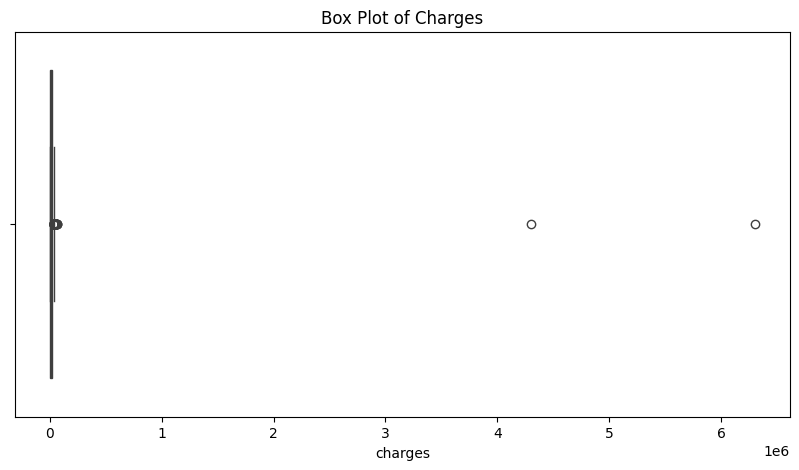

In [29]:
# Vẽ biểu đồ nến (box plot)
plt.figure(figsize=(10, 5))
sns.boxplot(x=insurance_dataset['charges'])
plt.title('Box Plot of Charges')
plt.show()

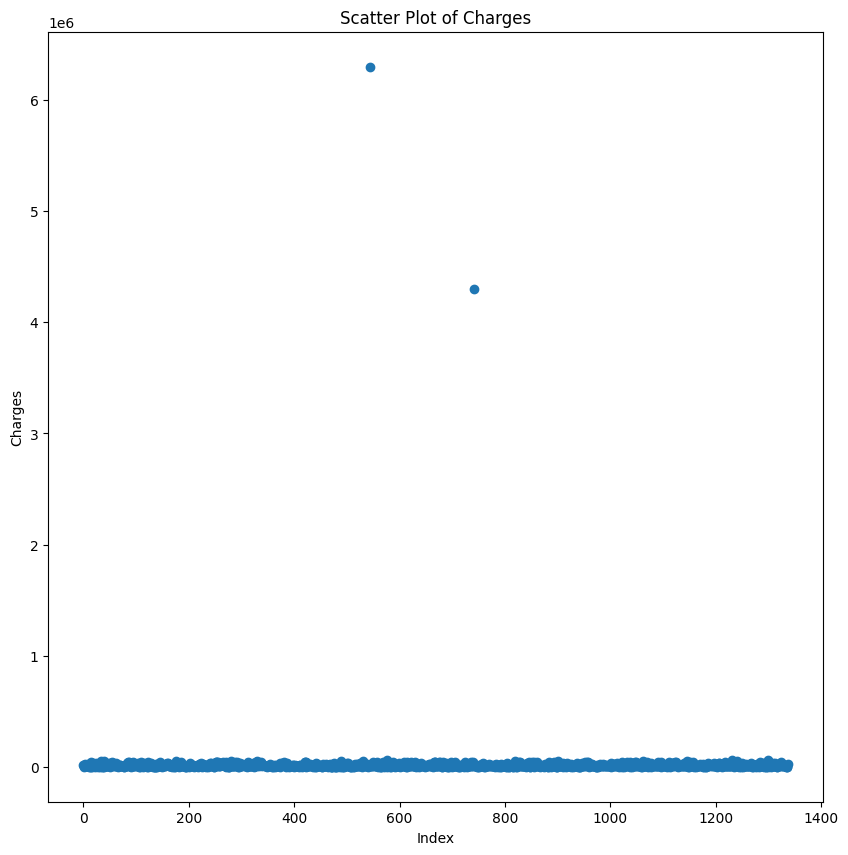

In [30]:

# Vẽ biểu đồ phân tán (scatter plot)
plt.figure(figsize=(10, 10))
plt.scatter(insurance_dataset.index, insurance_dataset['charges'])
plt.title('Scatter Plot of Charges')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.show()

In [31]:
# Xác định các giá trị nằm ngoài (ví dụ: > 70000)
outliers = insurance_dataset[insurance_dataset['charges'] > 70000]

# In ra các giá trị nằm ngoài để kiểm tra
print("Các giá trị nằm ngoài trước khi thay thế:")
print(outliers)

# Thay thế các giá trị nằm ngoài bằng giá trị trung bình (hoặc giá trị khác phù hợp)
mean_charge = insurance_dataset[insurance_dataset['charges'] <= 70000]['charges'].median()
insurance_dataset.loc[insurance_dataset['charges'] > 70000, 'charges'] = mean_charge

# Kiểm tra lại các giá trị nằm ngoài sau khi thay thế
outliers_after = insurance_dataset[insurance_dataset['charges'] > 70000]
print("Các giá trị nằm ngoài sau khi thay thế:")
print(outliers_after)

Các giá trị nằm ngoài trước khi thay thế:
     age     sex     bmi  children smoker     region      charges
543   54  female 47.4100         0    yes  southeast 6300770.4280
742   53    male 34.1050         0    yes  northeast 4300254.4179
Các giá trị nằm ngoài sau khi thay thế:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


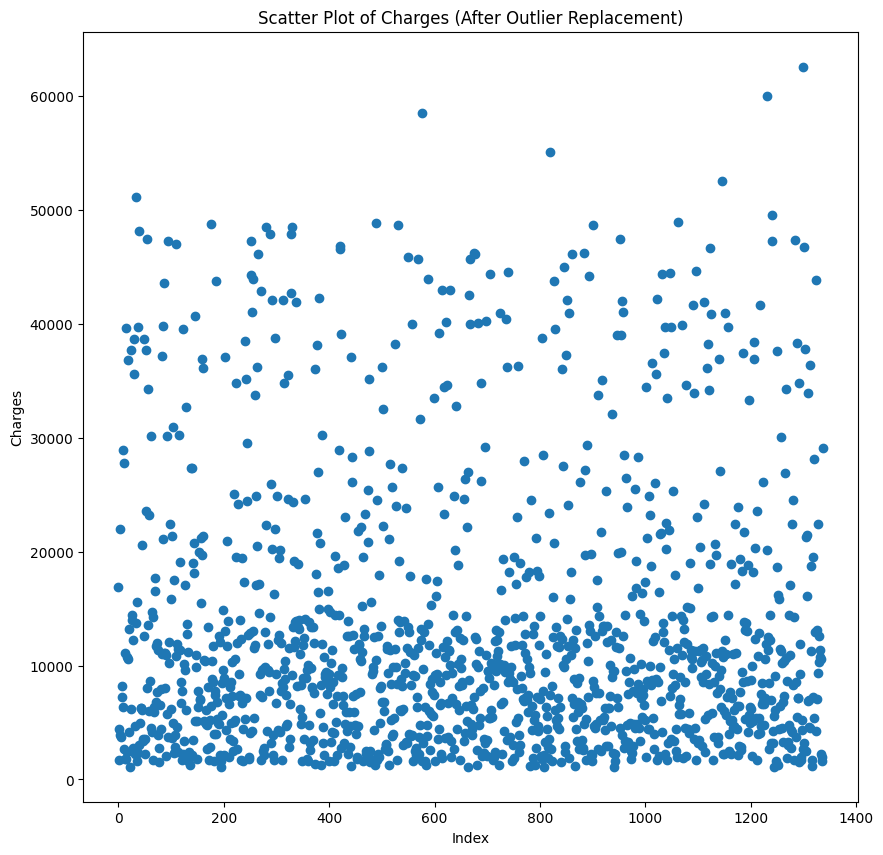

In [32]:
# Vẽ lại biểu đồ phân tán sau khi thay thế
plt.figure(figsize=(10, 10))
plt.scatter(insurance_dataset.index, insurance_dataset['charges'])
plt.title('Scatter Plot of Charges (After Outlier Replacement)')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.show()


<Figure size 600x600 with 0 Axes>

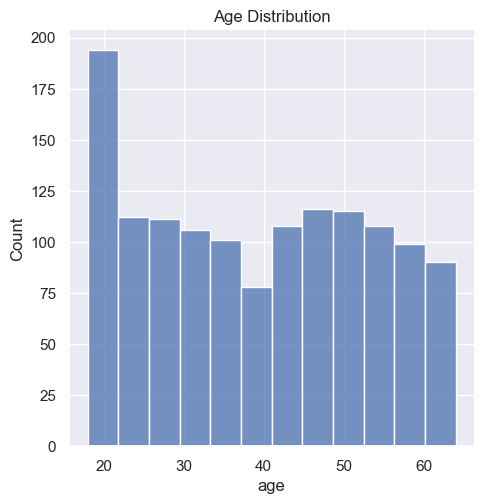

In [33]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

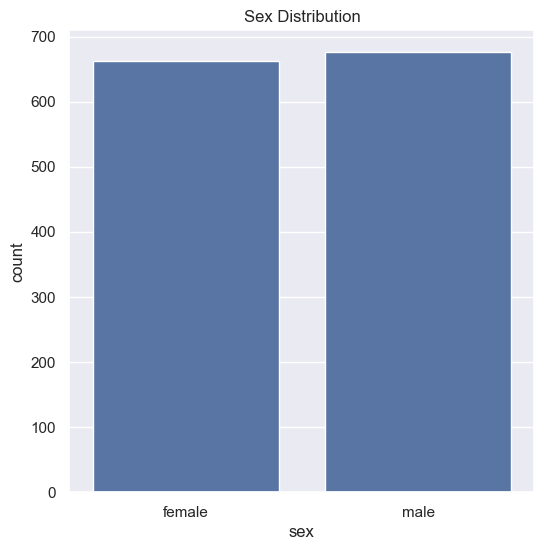

In [34]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [35]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

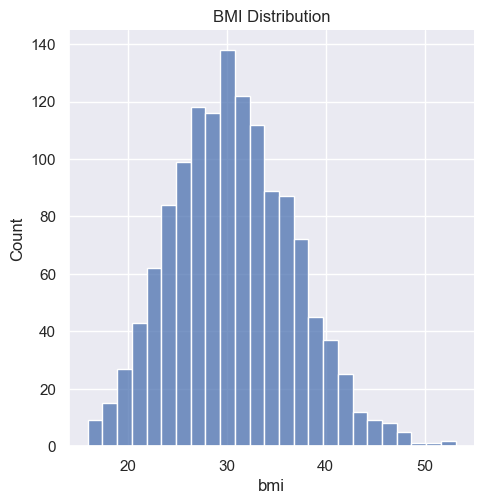

In [36]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

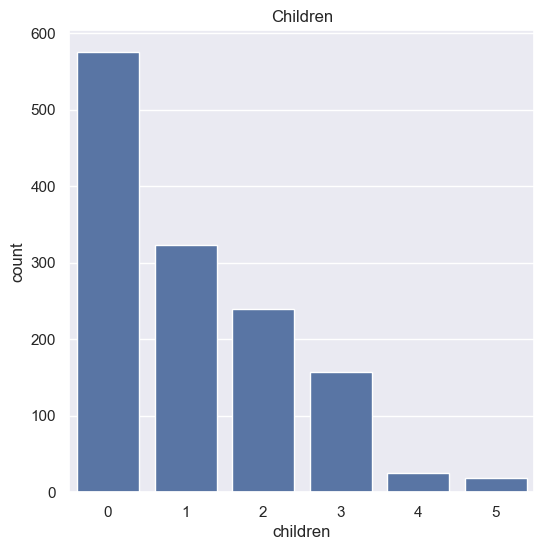

In [37]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [38]:
insurance_dataset['children'].value_counts()

children
0    575
1    323
2    240
3    157
4     25
5     18
Name: count, dtype: int64

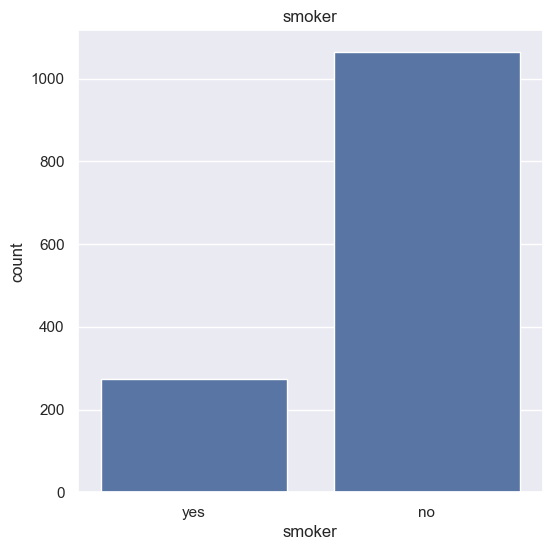

In [39]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [40]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

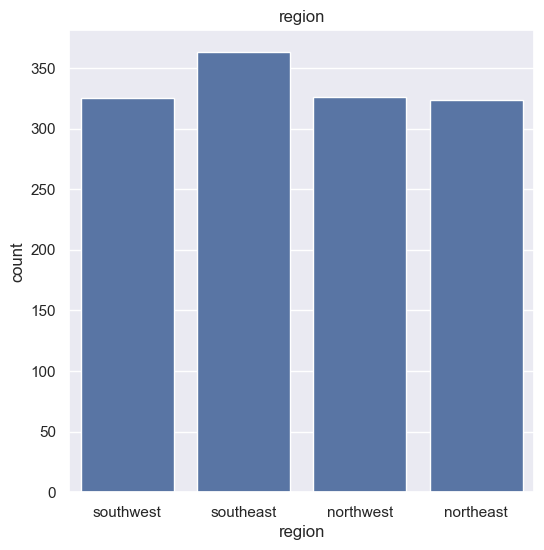

In [41]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [42]:
insurance_dataset['region'].value_counts()

region
southeast    363
northwest    326
southwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

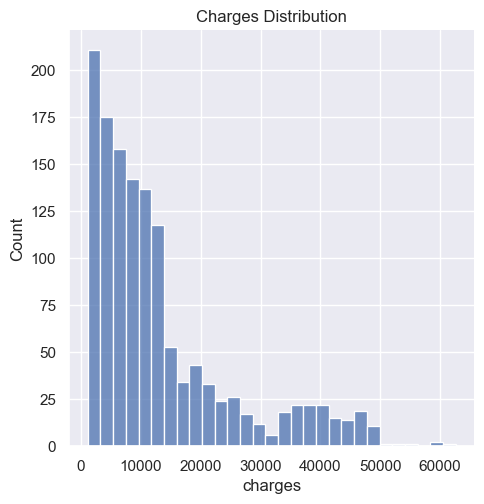

In [43]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [44]:
# Mã hóa cột 'sex'
insurance_dataset['sex'] = insurance_dataset['sex'].map({'male': 1, 'female': 0})

# Mã hóa cột 'smoker'
insurance_dataset['smoker'] = insurance_dataset['smoker'].map({'yes': 1, 'no': 0})

# Mã hóa cột 'region'
insurance_dataset['region'] = insurance_dataset['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})

In [45]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [46]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0 27.9000         0       1       1
1      18    1 33.7700         1       0       0
2      28    1 33.0000         3       0       0
3      33    1 22.7050         0       0       3
4      32    1 28.8800         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1 30.9700         3       0       3
1334   18    0 31.9200         0       0       2
1335   18    0 36.8500         0       0       0
1336   21    0 25.8000         0       0       1
1337   61    0 29.0700         0       1       3

[1338 rows x 6 columns]


In [47]:
print(Y)

0      16884.9240
1       1725.5523
2       4449.4620
3      21984.4706
4       3866.8552
          ...    
1333   10600.5483
1334    2205.9808
1335    1629.8335
1336    2007.9450
1337   29141.3603
Name: charges, Length: 1338, dtype: float64


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [50]:
# khởi tạo model Linear Regression
regressor = LinearRegression()

In [51]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [52]:
# dự đoán trên tập dữ liệu train
training_data_prediction = regressor.predict(X_train)

In [53]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.738320694483984


In [54]:
# dự đoán trên tập dữ liệu test
test_data_prediction =regressor.predict(X_test)

In [55]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7432380500182263


In [67]:
# Tên các cột của mô hình đã huấn luyện
column_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

while True:
    # Nhập và kiểm tra giá trị tuổi (age)
    while True:
        try:
            age = int(input("Nhập tuổi (age, số nguyên dương): "))
            if age > 0:
                break
            else:
                print("Tuổi phải là số nguyên dương. Vui lòng nhập lại.")
        except ValueError:
            print("Giá trị không hợp lệ. Vui lòng nhập số nguyên.")

    # Nhập và kiểm tra giá trị giới tính (sex)
    while True:
        sex = input("Nhập giới tính (sex: 0 = nữ, 1 = nam): ")
        if sex in ['0', '1']:
            sex = int(sex)
            break
        else:
            print("Giá trị không hợp lệ. Vui lòng nhập 0 hoặc 1.")

    # Nhập và kiểm tra giá trị chỉ số BMI (bmi)
    while True:
        try:
            bmi = float(input("Nhập chỉ số BMI (bmi): "))
            if bmi > 0:
                break
            else:
                print("BMI phải là số dương. Vui lòng nhập lại.")
        except ValueError:
            print("Giá trị không hợp lệ. Vui lòng nhập số.")

    # Nhập và kiểm tra số lượng con cái (children)
    while True:
        try:
            children = int(input("Nhập số lượng con cái (children, số nguyên dương): "))
            if children >= 0:
                break
            else:
                print("Số lượng con cái phải là số nguyên không âm. Vui lòng nhập lại.")
        except ValueError:
            print("Giá trị không hợp lệ. Vui lòng nhập số nguyên.")

    # Nhập và kiểm tra tình trạng hút thuốc (smoker)
    while True:
        smoker = input("Nhập tình trạng hút thuốc (smoker: 0 = không, 1 = có): ")
        if smoker in ['0', '1']:
            smoker = int(smoker)
            break
        else:
            print("Giá trị không hợp lệ. Vui lòng nhập 0 hoặc 1.")

    # Nhập và kiểm tra vùng (region)
    while True:
        region = input("Nhập vùng (region: 0 = southwest, 1 = southeast, 2 = northwest, 3 = northeast): ")
        if region in ['0', '1', '2', '3']:
            region = int(region)
            break
        else:
            print("Giá trị không hợp lệ. Vui lòng nhập giá trị từ 0 đến 3.")

    # Tạo input_data dưới dạng DataFrame
    input_data = pd.DataFrame([[age, sex, bmi, children, smoker, region]], columns=column_names)

    # Dự đoán chi phí bảo hiểm
    prediction = regressor.predict(input_data)
    print(f"Chi phí bảo hiểm dự đoán là: {prediction[0]:.2f} USD")

    # Hỏi người dùng có muốn nhập liệu tiếp không
    cont = input("Bạn có muốn tiếp tục nhập dữ liệu không? (y/n): ").strip().lower()
    if cont != 'y':
        break


Nhập tuổi (age, số nguyên dương):  20
Nhập giới tính (sex: 0 = nữ, 1 = nam):  1
Nhập chỉ số BMI (bmi):  25
Nhập số lượng con cái (children, số nguyên dương):  0
Nhập tình trạng hút thuốc (smoker: 0 = không, 1 = có):  0
Nhập vùng (region: 0 = southwest, 1 = southeast, 2 = northwest, 3 = northeast):  0


Chi phí bảo hiểm dự đoán là: 978.81 USD


Bạn có muốn tiếp tục nhập dữ liệu không? (y/n):  y
Nhập tuổi (age, số nguyên dương):  20
Nhập giới tính (sex: 0 = nữ, 1 = nam):  1
Nhập chỉ số BMI (bmi):  25
Nhập số lượng con cái (children, số nguyên dương):  1
Nhập tình trạng hút thuốc (smoker: 0 = không, 1 = có):  1
Nhập vùng (region: 0 = southwest, 1 = southeast, 2 = northwest, 3 = northeast):  0


Chi phí bảo hiểm dự đoán là: 25108.51 USD


Bạn có muốn tiếp tục nhập dữ liệu không? (y/n):  n


In [57]:
m = regressor.coef_
m

array([  246.24302547,    68.39127986,   302.02403502,   641.47973924,
       23488.22289308,   210.18735489])

In [58]:
b = regressor.intercept_
b

-11565.04375134092

In [59]:
y = b + np.dot(m, [20,1,25,0,0,0])
print(y)

978.8089133938156


R-squared: 0.613


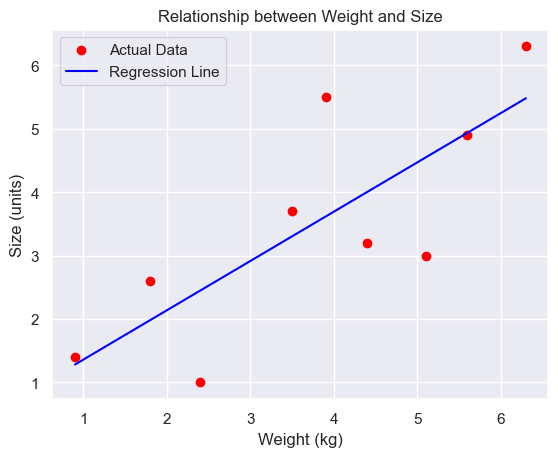

Mean Mouse Size: 3.511
Total Sum of Squares (SST): 25.649
Residual Sum of Squares (SSR): 9.919
Size preriction: [1.28135897 1.98139744 2.44808974 3.30369231 3.61482051 4.00373077
 4.54820513 4.93711538 5.48158974]


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dữ liệu về cân nặng và kích thước
weight = np.array([0.9, 1.8, 2.4, 3.5, 3.9, 4.4, 5.1, 5.6, 6.3]).reshape(-1, 1)
size = np.array([1.4, 2.6, 1.0, 3.7, 5.5, 3.2, 3.0, 4.9, 6.3])

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(weight, size)

# Tạo giá trị dự đoán từ mô hình
size_pred = model.predict(weight)

# Tính giá trị R-squared
r_squared = r2_score(size, size_pred)
print(f"R-squared: {r_squared:.3f}")

# Vẽ biểu đồ scatter plot
plt.scatter(weight, size, color='red', label='Actual Data')

# Vẽ đường hồi quy tuyến tính
plt.plot(weight, size_pred, color='blue', label='Regression Line')

# Thiết lập tiêu đề và nhãn trục
plt.title('Relationship between Weight and Size')
plt.xlabel('Weight (kg)')
plt.ylabel('Size (units)')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Tính giá trị trung bình của kích thước chuột
mean_size = np.mean(size)
print(f"Mean Mouse Size: {mean_size:.3f}")

# Tính tổng bình phương sai lệch giữa giá trị thực tế và giá trị trung bình
ss_total = np.sum((size - mean_size) ** 2)
print(f"Total Sum of Squares (SST): {ss_total:.3f}")

# Tính tổng bình phương sai lệch giữa giá trị thực tế và giá trị dự đoán
ss_residual = np.sum((size - size_pred) ** 2)
print(f"Residual Sum of Squares (SSR): {ss_residual:.3f}")

print(f"Size preriction: {size_pred}")

In [61]:
X = np.array([
    [1, 37, 0, 29.83, 2, 1, 2],
    [1, 19, 1, 27.90, 0, 0, 1],
    [1, 25, 0, 26.22, 0, 1, 2],
    [1, 28, 0, 33.00, 3, 1, 0],
    [1, 33, 0, 22.705, 0, 1, 3],
    [1, 60, 1, 25.84, 0, 1, 3],
    [1, 56, 1, 39.82, 0, 1, 0],
    [1, 62, 1, 26.29, 0, 0, 0]
])

y = np.array([6406.41070, 16884.92400, 2721.32080, 44849.46200, 2554.47061, 28923.13692, 11090.71780, 27808.72510])

b = np.linalg.inv(X.T @ X) @ X.T @ y

print(b)



[140852.83947119   -387.52770723  55737.07378374  -5501.38708285
  13710.67170885  54968.55971072 -18976.26710394]


In [62]:
regressor_exp = LinearRegression()
regressor_exp.fit(X,y)

LinearRegression()

In [63]:
b = regressor_exp.coef_
print(b)


[     0.           -387.52770723  55737.07378375  -5501.38708286
  13710.67170885  54968.55971072 -18976.26710394]


In [64]:
m = regressor_exp.intercept_
print(m)

140852.83947119483


In [65]:
data_prediction = regressor_exp.predict(X)
data_prediction

array([ 6845.30654249, 16761.92010188,  3934.30298071, 44556.86477168,
        1195.18981513, 29222.16699878, 10791.68772122, 27931.72899812])

In [66]:
r2 = metrics.r2_score(y, data_prediction)
print(r2)

0.9976073912829436
